# Predicting Heart Rate: An Advanced Modeling Approach with ML & DEEP LEARNING ALGORITHMS

## **Introduction**
## Background Story:

In the realm of healthcare and physiological monitoring, accurate prediction of an individual's heart rate plays a crucial role in understanding and managing cardiovascular health. To embark on this journey, we delve into a comprehensive dataset that encapsulates diverse attributes derived from signals measured through Electrocardiogram (ECG) recordings. Each individual in the dataset showcases unique physiological characteristics, contributing to varying heart rates at the time of measurement.

## Dataset Overview:

Our dataset is a rich repository of features extracted from ECG recordings, encompassing signals and attributes that collectively contribute to the intricate task of predicting heart rates. The objective is to construct an advanced predictive model that can precisely estimate an individual's heart rate based on these diverse attributes.

# Goal:

The overarching goal of this project is to develop and evaluate sophisticated predictive models capable of discerning the intricate relationships between the extracted features and an individual's heart rate. We aim to explore and implement multiple modeling approaches, including traditional machine learning algorithms such as Random Forest and XGBoost, as well as leveraging deep learning through Long Short-Term Memory (LSTM) networks.

## Outline:

Data Loading and Exploration:
- Load the dataset from a specified CSV file path.
- Explore the characteristics of the dataset, understanding the distribution of features and target variables.

Data Preprocessing:
- Conduct preprocessing steps to handle missing values, normalize features, and encode categorical variables.
- Prepare the dataset for feeding into machine learning and deep learning models.

Model Training:
- Train traditional machine learning models (Random Forest, XGBoost) to establish baseline performance.
- Explore the power of deep learning with the implementation of an LSTM-based neural network.

Model Evaluation:
- Assess the performance of each model using relevant evaluation metrics.
- Compare and contrast the strengths and weaknesses of different modeling approaches.

# Conclusion:

Summarize findings, discuss insights gained from the models, and provide recommendations for further exploration.
If you are interested in model development directly, feel free to jump ahead and dive into the fascinating world of predictive modeling.

Let's begin the exploration and modeling process!

# Getting the data...

In [1]:
!git clone https://github.com/sriharikgiitdh/AI_CURE_PARSEC.git

Cloning into 'AI_CURE_PARSEC'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 25 (delta 5), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (25/25), 2.89 MiB | 6.97 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [2]:
cd /content/AI_CURE_PARSEC

/content/AI_CURE_PARSEC


# Importing required data's and regarding packages

In [41]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [8]:
train_data =  pd.read_csv('/content/AI_CURE_PARSEC/train_data.csv')
test_data = pd.read_csv('/content/AI_CURE_PARSEC/sample_test_data.csv')
out_test = pd.read_csv('/content/AI_CURE_PARSEC/sample_output_generated.csv')

# EDA & DATA ANALYSIS PART

In [47]:
train_data.head(3)

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
0,4a122afe-6e52-4ed0-840d-66155da95ba1,2259.833995,67.884986,1058.573968,31.799362,99.017120,10.507787,0.315652,0.982880,3328.915749,...,-0.812408,-0.156490,-0.000055,-0.000191,0.017395,0.007729,0.007729,2.250533,-0.812408,-0.156490
1,0848f722-52ec-420c-adb1-a1e90a2e2709,2430.367576,60.980572,1541.466293,38.677070,99.122594,13.644635,0.342359,0.877406,3985.478504,...,0.014594,-0.595771,-0.000035,-0.000671,0.021513,0.011262,0.011262,1.910181,0.014594,-0.595771
2,7814286a-f939-45a7-8620-82b339a7ad4b,989.800997,27.651929,2478.164707,69.232133,95.693128,111.535043,3.115939,4.306872,3579.500746,...,-0.470107,0.170303,0.000080,-0.001355,0.029976,0.015781,0.015781,1.899494,-0.470107,0.170303


In [48]:
test_data.head(3)

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
0,1ae30e0b-098e-46fc-a897-0a6661f26370,1038.142757,43.053026,1316.747853,54.607113,95.891158,56.421352,2.339861,4.108842,2411.311962,...,-0.165101,-0.224105,-0.000032,-0.000942,0.022748,0.012756,0.012756,1.783259,-0.165101,-0.224105
1,428b41b3-9461-4c79-ab4e-d03b122b2553,1069.353244,27.758342,2663.293874,69.133958,95.698188,119.720039,3.107701,4.301812,3852.367156,...,-0.729494,0.169267,0.000129,-0.002245,0.031830,0.017082,0.017082,1.863380,-0.729494,0.169267
2,88f82ac7-02dd-447e-a289-22e8e22432c2,1044.054317,62.673708,618.715329,37.140964,99.503494,3.087286,0.185327,0.496506,1665.856933,...,0.408727,-0.099498,-0.000022,0.000121,0.012729,0.005996,0.005996,2.122806,0.408727,-0.099498


In [55]:
df.columns

Index(['uuid', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT',
       'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci',
       'datasetId', 'condition', 'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD',
       'SDSD', 'SDRR_RMSSD', 'HR', 'pNN25', 'pNN50', 'KURT', 'SKEW',
       'MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR',
       'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR'],
      dtype='object')

In [49]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   uuid               5000 non-null   object 
 1   VLF                5000 non-null   float64
 2   VLF_PCT            5000 non-null   float64
 3   LF                 5000 non-null   float64
 4   LF_PCT             5000 non-null   float64
 5   LF_NU              5000 non-null   float64
 6   HF                 5000 non-null   float64
 7   HF_PCT             5000 non-null   float64
 8   HF_NU              5000 non-null   float64
 9   TP                 5000 non-null   float64
 10  LF_HF              5000 non-null   float64
 11  HF_LF              5000 non-null   float64
 12  SD1                5000 non-null   float64
 13  SD2                5000 non-null   float64
 14  sampen             5000 non-null   float64
 15  higuci             5000 non-null   float64
 16  datasetId          5000 

In [51]:
train_data.isnull().sum()

uuid                 0
VLF                  0
VLF_PCT              0
LF                   0
LF_PCT               0
LF_NU                0
HF                   0
HF_PCT               0
HF_NU                0
TP                   0
LF_HF                0
HF_LF                0
SD1                  0
SD2                  0
sampen               0
higuci               0
datasetId            0
condition            0
MEAN_RR              0
MEDIAN_RR            0
SDRR                 0
RMSSD                0
SDSD                 0
SDRR_RMSSD           0
HR                   0
pNN25                0
pNN50                0
KURT                 0
SKEW                 0
MEAN_REL_RR          0
MEDIAN_REL_RR        0
SDRR_REL_RR          0
RMSSD_REL_RR         0
SDSD_REL_RR          0
SDRR_RMSSD_REL_RR    0
KURT_REL_RR          0
SKEW_REL_RR          0
dtype: int64

In [52]:
train_data.isna().sum()

uuid                 0
VLF                  0
VLF_PCT              0
LF                   0
LF_PCT               0
LF_NU                0
HF                   0
HF_PCT               0
HF_NU                0
TP                   0
LF_HF                0
HF_LF                0
SD1                  0
SD2                  0
sampen               0
higuci               0
datasetId            0
condition            0
MEAN_RR              0
MEDIAN_RR            0
SDRR                 0
RMSSD                0
SDSD                 0
SDRR_RMSSD           0
HR                   0
pNN25                0
pNN50                0
KURT                 0
SKEW                 0
MEAN_REL_RR          0
MEDIAN_REL_RR        0
SDRR_REL_RR          0
RMSSD_REL_RR         0
SDSD_REL_RR          0
SDRR_RMSSD_REL_RR    0
KURT_REL_RR          0
SKEW_REL_RR          0
dtype: int64

Hence our data doesn't contains any null or nan values let's we get in to analysis part

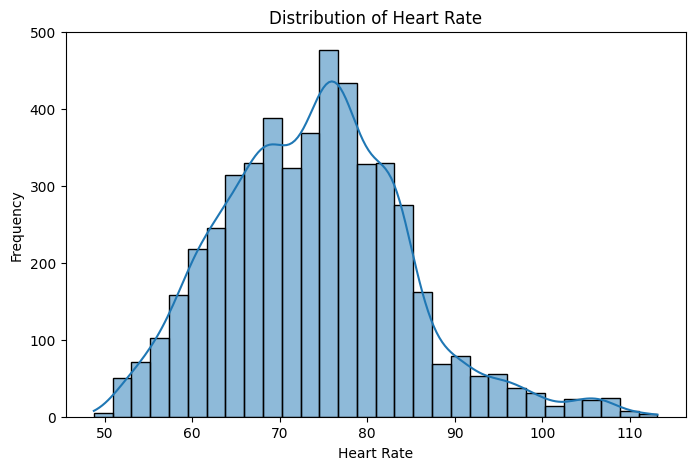

In [53]:
# Histogram of Heart Rate
plt.figure(figsize=(8, 5))
sns.histplot(train_data['HR'], bins=30, kde=True)
plt.title('Distribution of Heart Rate')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.show()

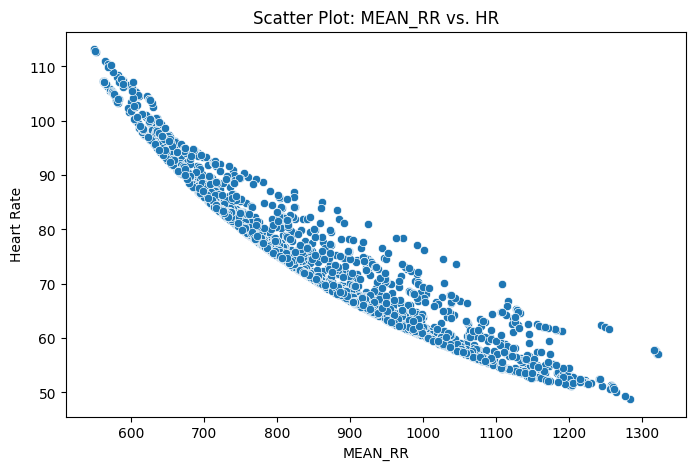

In [54]:
# Scatter Plot
df = train_data.copy()
plt.figure(figsize=(8, 5))
sns.scatterplot(x='MEAN_RR', y='HR', data=df)
plt.title('Scatter Plot: MEAN_RR vs. HR')
plt.xlabel('MEAN_RR')
plt.ylabel('Heart Rate')
plt.show()

In [56]:
# Let's understand the data by splitting the frequency, heart rate-related data, and time-related data separately to gain a better understanding.

heart_df = df[['uuid','SD1','SD1','sampen', 'higuci','datasetId', 'condition']]
freq_df = df[['uuid', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT',
       'HF_NU', 'TP', 'LF_HF', 'HF_LF']]
time_df = df[['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD',
       'SDSD', 'SDRR_RMSSD', 'HR', 'pNN25', 'pNN50', 'KURT', 'SKEW',
       'MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR',
       'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR','uuid']]

<ipython-input-57-3e2eee36a065>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = freq_df.corr()


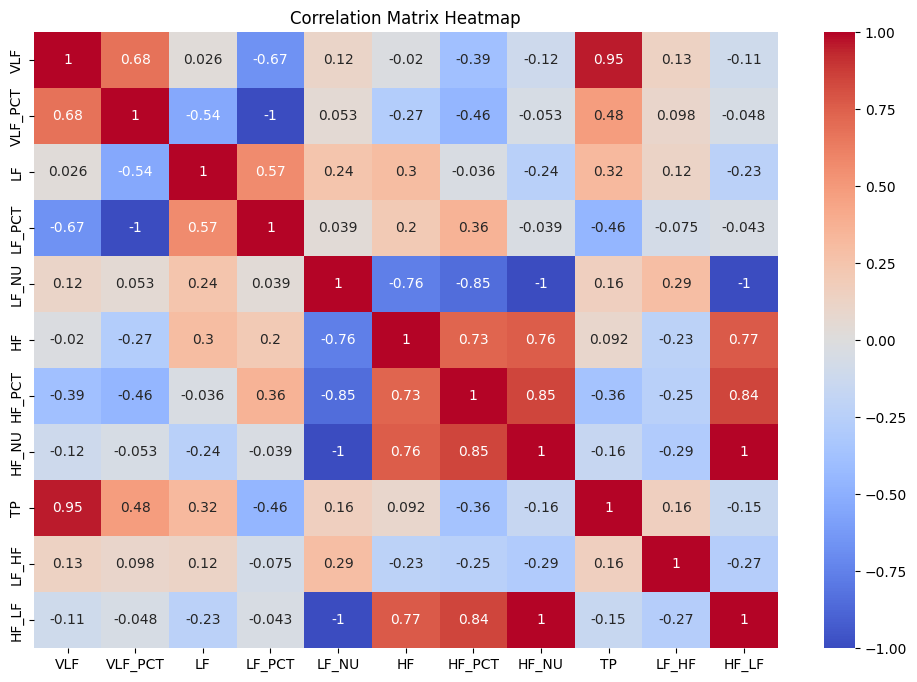

In [57]:
# Correlation Matrix Heatmap for frequency
correlation_matrix = freq_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

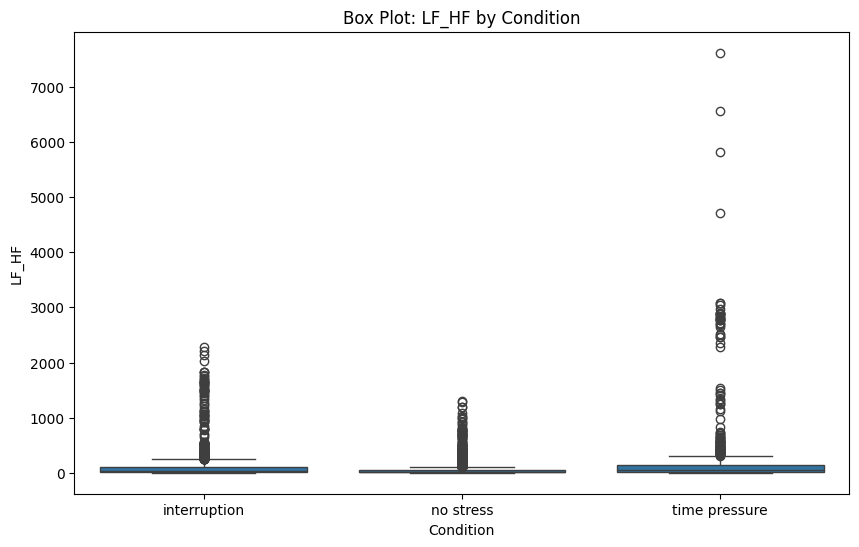

In [58]:
# Box Plot for LF_HF grouped by Condition
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='LF_HF', data=df)
plt.title('Box Plot: LF_HF by Condition')
plt.xlabel('Condition')
plt.ylabel('LF_HF')
plt.show()

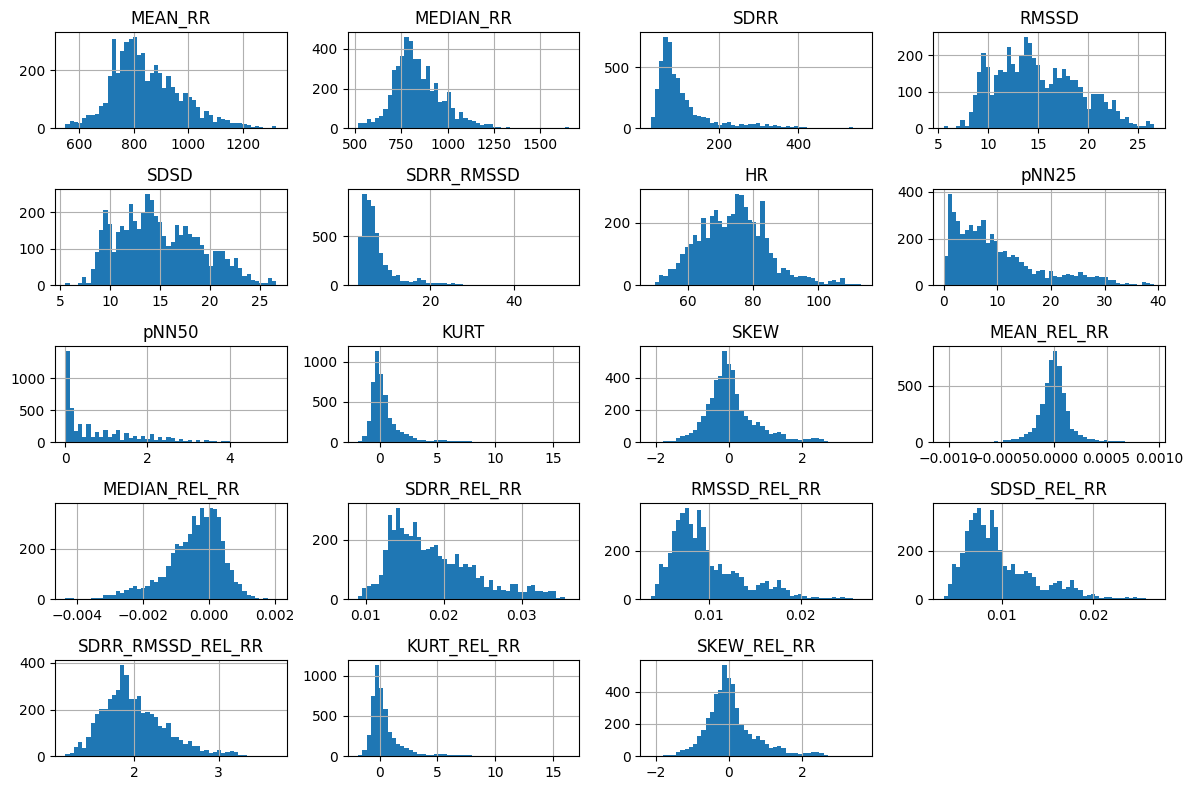

In [59]:
time_df.hist(bins=50 , figsize=(12,8))
plt.tight_layout()
plt.show()

In [60]:
heart_df['datasetId'].value_counts()

2    5000
Name: datasetId, dtype: int64

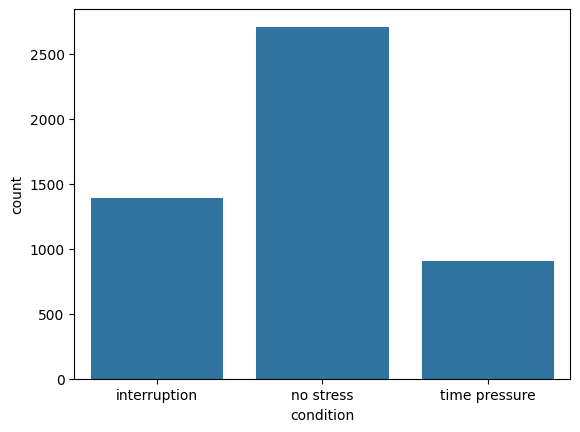

In [61]:
import seaborn as sn
ax = sn.countplot(x='condition',data=heart_df)

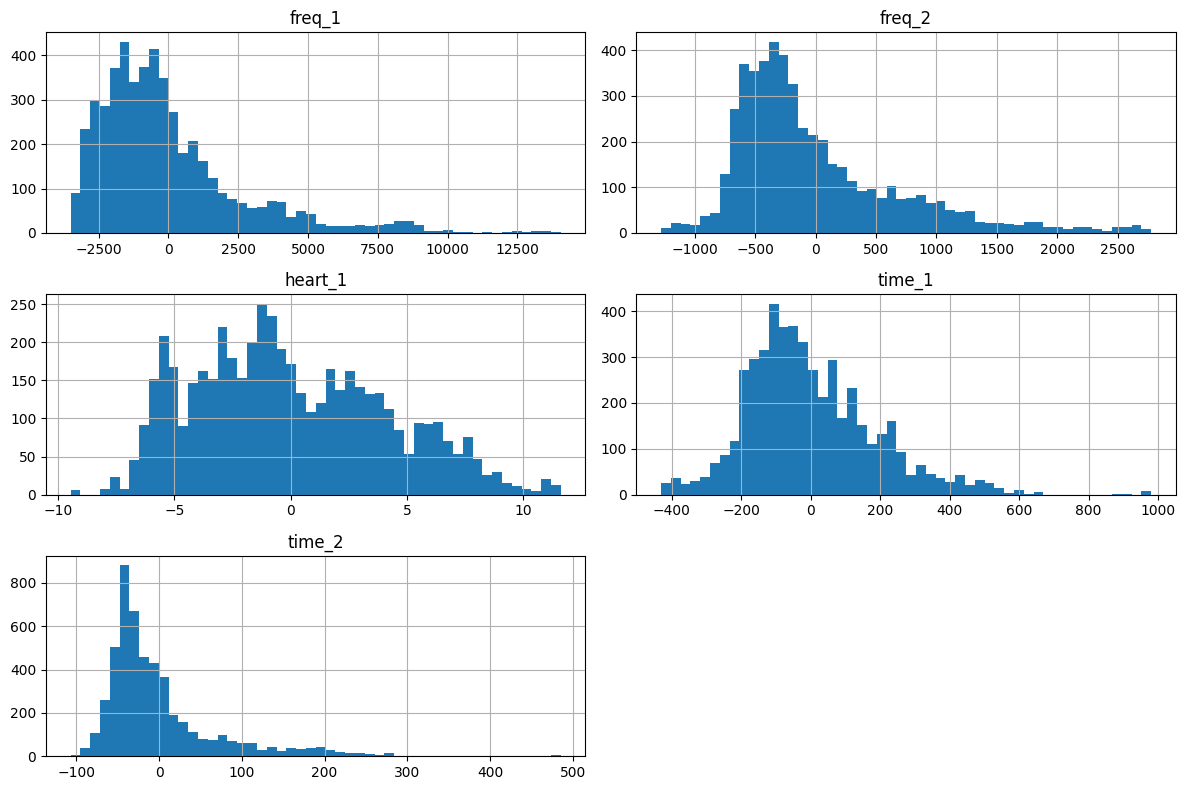

# Model Training

## Linear Regression

In [62]:
X_train =train_data[['VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT',
       'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci',
       'datasetId', 'condition', 'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD',
       'SDSD', 'SDRR_RMSSD', 'pNN25', 'pNN50', 'KURT', 'SKEW',
       'MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR',
       'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR']]
y_train = train_data[['HR']]

X_test =test_data[['VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT',
       'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci',
       'datasetId', 'condition', 'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD',
       'SDSD', 'SDRR_RMSSD', 'pNN25', 'pNN50', 'KURT', 'SKEW',
       'MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR',
       'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR']]
y_test = out_test[['HR']]

# One-hot encode the 'condition' column
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_encoded = pd.concat([X_train, pd.DataFrame(encoder.fit_transform(X_train[['condition']]), columns=encoder.get_feature_names_out(['condition']))], axis=1)
X_test_encoded = pd.concat([X_test, pd.DataFrame(encoder.transform(X_test[['condition']]), columns=encoder.get_feature_names_out(['condition']))], axis=1)

# Drop the original 'condition' column
X_train_encoded = X_train_encoded.drop(['condition'], axis=1)
X_test_encoded = X_test_encoded.drop(['condition'], axis=1)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate R-squared score (accuracy)
accuracy = r2_score(y_test, y_pred)
linear_reg_acc = accuracy * 100
print(f'R-squared (Accuracy): {accuracy * 100:.2f}%')

R-squared (Accuracy): 96.28%


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### let's we try the naive bayes regressor

In [63]:
# Train the Ridge Regression model
ridge_model = Ridge()
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test_scaled)

# Calculate R-squared score (accuracy)
accuracy = r2_score(y_test, y_pred)
naive_reg_acc = accuracy * 100
print(f'R-squared (Accuracy): {accuracy * 100:.2f}%')

R-squared (Accuracy): 96.37%


umm, here we achieve .09% better accuracy than the previous model, but it may get varied when we apply for real world applications

## xgboost

In [64]:
# Train the XGBoost Regressor model
xgb_model = XGBRegressor()
xgb_model.fit(X_train_scaled, y_train.values.ravel())  # Convert y_train to a 1D array

# Make predictions on the test set
y_pred = xgb_model.predict(X_test_scaled)

# Calculate R-squared score (accuracy)
accuracy = r2_score(y_test, y_pred)
xgboost_reg_acc = accuracy * 100
print(f'R-squared (Accuracy): {accuracy * 100:.2f}%')

R-squared (Accuracy): 99.75%


## Random Forest Regressor

In [65]:
# Train the Random Forest Regressor model
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train.values.ravel())  # Convert y_train to a 1D array

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Calculate R-squared score (accuracy)
accuracy = r2_score(y_test, y_pred)
randomforest_reg_acc = accuracy * 100
print(f'R-squared (Accuracy): {accuracy * 100:.2f}%')

R-squared (Accuracy): 99.95%


Great!! here out model fits the best fit, which cover's all the unseen pattern's and probablistic values.

but we don't have to stop here, let's we try jumping into neural networks. (another exact reason is, the model should not be always in 100%.. are merely .05% around for 100% of the variance, the fitted values would always equal the observed values and, therefore, all the data points would fall on the fitted regression line.)

## feedforward neural network with two hidden layers - FNN

In [66]:
X = train_data[['VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT',
       'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci',
       'datasetId', 'condition', 'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD',
       'SDSD', 'SDRR_RMSSD', 'pNN25', 'pNN50', 'KURT', 'SKEW',
       'MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR',
       'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR']]

y = train_data[['HR']]

# One-hot encode the 'condition' column
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.concat([X, pd.DataFrame(encoder.fit_transform(X[['condition']]), columns=encoder.get_feature_names_out(['condition']))], axis=1)

# Drop the original 'condition' column
X_encoded = X_encoded.drop(['condition'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a simple neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer with 1 neuron for regression task
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the neural network
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)

# Calculate R-squared score (accuracy)
accuracy = r2_score(y_test, y_pred)
fnn_reg_acc = accuracy * 100
print(f'R-squared (Accuracy): {accuracy * 100:.2f}%')

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


100/100 [==============================] - 1s 4ms/step - loss: 4065.3066 - val_loss: 1393.3152
Epoch 2/50
100/100 [==============================] - 0s 2ms/step - loss: 464.3666 - val_loss: 249.9254
Epoch 3/50
100/100 [==============================] - 0s 3ms/step - loss: 195.5031 - val_loss: 157.3737
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 123.9011 - val_loss: 108.0255
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 86.1115 - val_loss: 82.1905
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 64.4096 - val_loss: 64.3559
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 50.0454 - val_loss: 51.6578
Epoch 8/50
100/100 [==============================] - 0s 4ms/step - loss: 40.0833 - val_loss: 42.1435
Epoch 9/50
100/100 [==============================] - 0s 3ms/step - loss: 32.7992 - val_loss: 34.7793
Epoch 10/50
100/100 [==============================] - 0s 3ms/step - loss: 27.0859 

LSTM

In [67]:
# One-hot encode the 'condition' column
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.concat([X, pd.DataFrame(encoder.fit_transform(X[['condition']]), columns=encoder.get_feature_names_out(['condition']))], axis=1)

# Drop the original 'condition' column
X_encoded = X_encoded.drop(['condition'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the data into sequences (assuming sequential data)
sequence_length = 10  # You may adjust this based on your data
X_train_sequence = [X_train_scaled[i:i + sequence_length] for i in range(len(X_train_scaled) - sequence_length + 1)]
y_train_sequence = y_train.values[sequence_length - 1:]

X_test_sequence = [X_test_scaled[i:i + sequence_length] for i in range(len(X_test_scaled) - sequence_length + 1)]
y_test_sequence = y_test.values[sequence_length - 1:]

# Convert to numpy arrays
X_train_sequence = np.array(X_train_sequence)
y_train_sequence = np.array(y_train_sequence)

X_test_sequence = np.array(X_test_sequence)
y_test_sequence = np.array(y_test_sequence)

# Build an LSTM-based neural network model
model = keras.Sequential([
    layers.LSTM(64, activation='relu', input_shape=(sequence_length, X_train_scaled.shape[1]), return_sequences=True),
    layers.LSTM(32, activation='relu'),
    layers.Dense(1)  # Output layer with 1 neuron for regression task
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the neural network
model.fit(X_train_sequence, y_train_sequence, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred_sequence = model.predict(X_test_sequence)

# Reshape the predictions to match the original shape
y_pred = y_pred_sequence.flatten()

# Calculate R-squared score (accuracy)
accuracy = r2_score(y_test_sequence, y_pred)
print(f'R-squared (Accuracy): {accuracy * 100:.2f}%')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/50
100/100 [==============================] - 7s 21ms/step - loss: 1230.4679 - val_loss: 100.5225
Epoch 2/50
100/100 [==============================] - 1s 11ms/step - loss: 64.7415 - val_loss: 57.1146
Epoch 3/50
100/100 [==============================] - 2s 16ms/step - loss: 27.9925 - val_loss: 21.2734
Epoch 4/50
100/100 [==============================] - 2s 18ms/step - loss: 15.6465 - val_loss: 13.4037
Epoch 5/50
100/100 [==============================] - 2s 24ms/step - loss: 10.5505 - val_loss: 9.8027
Epoch 6/50
100/100 [==============================] - 2s 21ms/step - loss: 7.0714 - val_loss: 7.1790
Epoch 7/50
100/100 [==============================] - 1s 13ms/step - loss: 5.2431 - val_loss: 6.3580
Epoch 8/50
100/100 [==============================] - 1s 14ms/step - loss: 5.8083 - val_loss: 5.0166
Epoch 9/50
100/100 [==============================] - 2s 15ms/step - loss: 4.4809 - val_loss: 4.3219
Epoch 10/50
100/100 [==============================] - 2s 18ms/step - loss: 3.5

Okay! let's we apply optimizer for this..

In [72]:
# Compile the model with Adam optimizer
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the neural network
model.fit(X_train_sequence, y_train_sequence, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred_sequence = model.predict(X_test_sequence)

# Reshape the predictions to match the original shape
y_pred = y_pred_sequence.flatten()
lstm_model = model
# Calculate R-squared score (accuracy)
accuracy = r2_score(y_test_sequence, y_pred)
lstm_reg_acc = accuracy * 100
print(f'R-squared (Accuracy): {accuracy * 100:.2f}%')

Epoch 1/50
100/100 [==============================] - 8s 40ms/step - loss: 2.6973 - val_loss: 0.2186
Epoch 2/50
100/100 [==============================] - 2s 25ms/step - loss: 0.0659 - val_loss: 0.2006
Epoch 3/50
100/100 [==============================] - 3s 26ms/step - loss: 0.0586 - val_loss: 0.1927
Epoch 4/50
100/100 [==============================] - 2s 22ms/step - loss: 0.0491 - val_loss: 0.2015
Epoch 5/50
100/100 [==============================] - 3s 29ms/step - loss: 0.0625 - val_loss: 0.1797
Epoch 6/50
100/100 [==============================] - 2s 20ms/step - loss: 0.0641 - val_loss: 0.1828
Epoch 7/50
100/100 [==============================] - 1s 13ms/step - loss: 0.0662 - val_loss: 0.3381
Epoch 8/50
100/100 [==============================] - 1s 13ms/step - loss: 0.0935 - val_loss: 0.2380
Epoch 9/50
100/100 [==============================] - 2s 16ms/step - loss: 0.0913 - val_loss: 0.2499
Epoch 10/50
100/100 [==============================] - 2s 25ms/step - loss: 0.1236 - val_lo

# Model selection

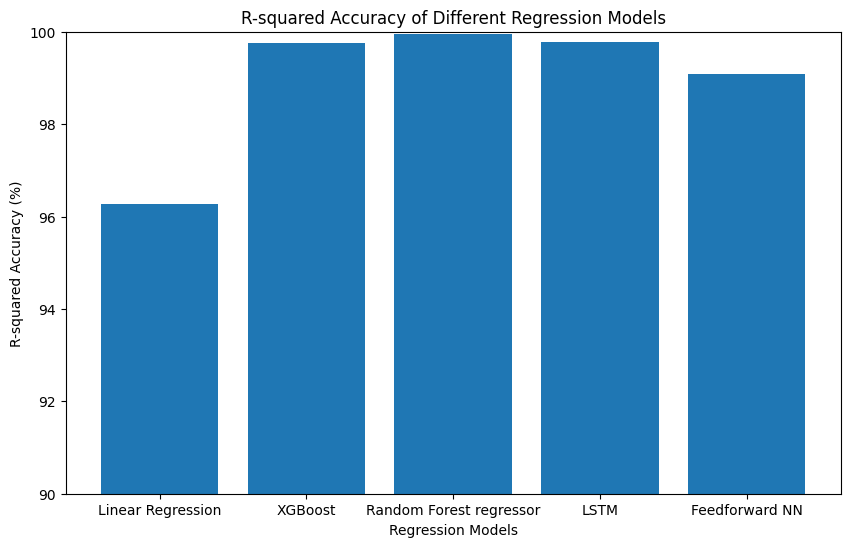

In [71]:
models_name = ['Linear Regression', 'XGBoost', 'Random Forest regressor', 'LSTM', 'Feedforward NN']
accuracies = [linear_reg_acc, xgboost_reg_acc, randomforest_reg_acc, lstm_reg_acc, fnn_reg_acc]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models_name, accuracies)
plt.xlabel('Regression Models')
plt.ylabel('R-squared Accuracy (%)')
plt.title('R-squared Accuracy of Different Regression Models')
plt.ylim(90, 100)
plt.show()

By Observing the above models, the best fit models are **Random Forest regressor**, **OPTIMISED-LSTM NETWORKS**, **XG_BOOST**

### let's export the best model's

In [74]:
import joblib

# Save scikit-learn models (Random Forest and XGBoost)
joblib.dump(rf_model, 'random_forest_model.joblib')
joblib.dump(xgb_model, 'xgboost_model.model')

# Save Keras model (LSTM)
model.save('lstm_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
